In [2]:
import pandas as pd

In [1]:
!git clone https://github.com/skp-github/MonaAI-Hackathon.git

Cloning into 'MonaAI-Hackathon'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 0), reused 13 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 2.74 MiB | 12.48 MiB/s, done.


In [3]:
%cd MonaAI-Hackathon/

/content/MonaAI-Hackathon


In [8]:
!ls

data  readme.md


In [56]:
input_file_path = input("Enter the input file path: ")

Enter the input file path: data/502acf0c3bfbe29dd8496a42634e85c7.csv


In [57]:
csv_file_path = input_file_path
data_frame = pd.read_csv(csv_file_path)

# Display all column names
column_names = data_frame.columns.tolist()
print("Column names (keys) in the CSV file:")
for column in column_names:
    print(column)

Column names (keys) in the CSV file:
dt
dt_iso
timezone
city_name
lat
lon
temp
visibility
dew_point
feels_like
temp_min
temp_max
pressure
sea_level
grnd_level
humidity
wind_speed
wind_deg
wind_gust
rain_1h
rain_3h
snow_1h
snow_3h
clouds_all
weather_id
weather_main
weather_description
weather_icon


In [58]:
unique_city_names = data_frame['city_name'].unique()
print("Unique city names in the CSV file:")
for city in unique_city_names:
    print(city)

Unique city names in the CSV file:
Merzig
Beckingen
Dillingen
Fremersdorf
Mettlach
Saarlouis
Saarwellingen
Wallerfangen
Saarbrücken
Blieskastel
Bexbach
Eppelborn
Freisen
Friedrichsthal
Homburg
Lebach
Neunkirchen
Ottweiler
Püttlingen
Sankt Ingbert
Sankt Wendel
Sulzbach
Völklingen
Wadern


In [59]:
city_timestamps = data_frame.groupby('city_name')['dt_iso'].apply(list).to_dict()

# Print all unique city names and their timestamps
for city, timestamps in city_timestamps.items():
    print(f"City: {city}")
    print(f"Timestamps:{len(timestamps)/24}")
    print(f"timestamps[0]-{timestamps[0]}")
    print(f"timestamps[-1]-{timestamps[-1]}")
    print("\n")

City: Beckingen
Timestamps:114.0
timestamps[0]-2024-03-01 00:00:00 +0000 UTC
timestamps[-1]-2024-06-22 23:00:00 +0000 UTC


City: Bexbach
Timestamps:117.83333333333333
timestamps[0]-2024-03-01 00:00:00 +0000 UTC
timestamps[-1]-2024-06-22 23:00:00 +0000 UTC


City: Blieskastel
Timestamps:117.54166666666667
timestamps[0]-2024-03-01 00:00:00 +0000 UTC
timestamps[-1]-2024-06-22 23:00:00 +0000 UTC


City: Dillingen
Timestamps:114.0
timestamps[0]-2024-03-01 00:00:00 +0000 UTC
timestamps[-1]-2024-06-22 23:00:00 +0000 UTC


City: Eppelborn
Timestamps:114.0
timestamps[0]-2024-03-01 00:00:00 +0000 UTC
timestamps[-1]-2024-06-22 23:00:00 +0000 UTC


City: Freisen
Timestamps:114.0
timestamps[0]-2024-03-01 00:00:00 +0000 UTC
timestamps[-1]-2024-06-22 23:00:00 +0000 UTC


City: Fremersdorf
Timestamps:114.0
timestamps[0]-2024-03-01 00:00:00 +0000 UTC
timestamps[-1]-2024-06-22 23:00:00 +0000 UTC


City: Friedrichsthal
Timestamps:118.16666666666667
timestamps[0]-2024-03-01 00:00:00 +0000 UTC
timestamps[

In [60]:
data_frame['dt_iso'] = pd.to_datetime(data_frame['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')

# Group the data by city_name and find repeated timestamps
repeated_timestamps = data_frame[data_frame.duplicated(subset=['city_name', 'dt_iso', 'rain_1h'], keep=False)]

# Print the repeated timestamps for each city
repeated_entery_cites = repeated_timestamps['city_name'].unique()
city_timestamps = data_frame.groupby('city_name')['dt_iso'].apply(list).to_dict()

# Print all unique city names and their timestamps
for city, timestamps in city_timestamps.items():
    print(f"City: {city}")
    print(f"No of Days: {len(timestamps)/24}")
    if city in repeated_entery_cites:
      print("Yes")
    print("\n")



City: Beckingen
No of Days: 114.0


City: Bexbach
No of Days: 117.83333333333333
Yes


City: Blieskastel
No of Days: 117.54166666666667
Yes


City: Dillingen
No of Days: 114.0


City: Eppelborn
No of Days: 114.0


City: Freisen
No of Days: 114.0


City: Fremersdorf
No of Days: 114.0


City: Friedrichsthal
No of Days: 118.16666666666667
Yes


City: Homburg
No of Days: 114.0


City: Lebach
No of Days: 114.0


City: Merzig
No of Days: 114.0


City: Mettlach
No of Days: 114.0


City: Neunkirchen
No of Days: 118.0
Yes


City: Ottweiler
No of Days: 114.0


City: Püttlingen
No of Days: 117.875
Yes


City: Saarbrücken
No of Days: 117.875
Yes


City: Saarlouis
No of Days: 114.0


City: Saarwellingen
No of Days: 114.0


City: Sankt Ingbert
No of Days: 118.0
Yes


City: Sankt Wendel
No of Days: 114.0


City: Sulzbach
No of Days: 118.0
Yes


City: Völklingen
No of Days: 117.91666666666667
Yes


City: Wadern
No of Days: 114.0


City: Wallerfangen
No of Days: 114.0




In [61]:
data_frame['dt_iso'] = pd.to_datetime(data_frame['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')

# Remove repeating timestamps for each city
data_frame = data_frame.drop_duplicates(subset=['city_name', 'dt_iso'], keep='first')

# Verify that all cities have the same number of unique timestamps
city_timestamp_counts = data_frame.groupby('city_name')['dt_iso'].nunique()

# Check if all cities have the same number of timestamps
all_cities_have_same_count = city_timestamp_counts.nunique() == 1

# Print the results
if all_cities_have_same_count:
    print("All cities have the same number of unique timestamps.")
else:
    print("Not all cities have the same number of unique timestamps.")

print("\nNumber of unique timestamps for each city:")
print(city_timestamp_counts)

All cities have the same number of unique timestamps.

Number of unique timestamps for each city:
city_name
Beckingen         2736
Bexbach           2736
Blieskastel       2736
Dillingen         2736
Eppelborn         2736
Freisen           2736
Fremersdorf       2736
Friedrichsthal    2736
Homburg           2736
Lebach            2736
Merzig            2736
Mettlach          2736
Neunkirchen       2736
Ottweiler         2736
Püttlingen        2736
Saarbrücken       2736
Saarlouis         2736
Saarwellingen     2736
Sankt Ingbert     2736
Sankt Wendel      2736
Sulzbach          2736
Völklingen        2736
Wadern            2736
Wallerfangen      2736
Name: dt_iso, dtype: int64


In [62]:
# Convert dt_iso to datetime with the correct format
data_frame['dt_iso'] = pd.to_datetime(data_frame['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')

# Group by city_name and verify if all lat and long values are the same
city_lat_long_consistency = data_frame.groupby('city_name').apply(lambda x: x[['lat', 'lon']].nunique().eq(1).all())

# Check if all cities have consistent lat and long values
all_cities_consistent = city_lat_long_consistency.all()

# Print the results
if all_cities_consistent:
    print("All cities have consistent latitude and longitude values.")
else:
    print("Not all cities have consistent latitude and longitude values.")

print("\nConsistency check for each city:")
print(city_lat_long_consistency)

All cities have consistent latitude and longitude values.

Consistency check for each city:
city_name
Beckingen         True
Bexbach           True
Blieskastel       True
Dillingen         True
Eppelborn         True
Freisen           True
Fremersdorf       True
Friedrichsthal    True
Homburg           True
Lebach            True
Merzig            True
Mettlach          True
Neunkirchen       True
Ottweiler         True
Püttlingen        True
Saarbrücken       True
Saarlouis         True
Saarwellingen     True
Sankt Ingbert     True
Sankt Wendel      True
Sulzbach          True
Völklingen        True
Wadern            True
Wallerfangen      True
dtype: bool


In [6]:
data_frame['dt_iso'] = pd.to_datetime(data_frame['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')
data_frame = data_frame.drop_duplicates(subset=['city_name', 'dt_iso', 'rain_1h'], keep='first')
# Ensure rain_1h is a float for aggregation and fill NaN values with 0
data_frame['rain_1h'] = pd.to_numeric(data_frame['rain_1h'], errors='coerce').fillna(0)

# Create a new column for the 24-hour window (start of each day)
data_frame['day'] = data_frame['dt_iso'].dt.floor('d')

# Group by city_name and day, then sum the rain_1h values
daily_rainfall = data_frame.groupby(['city_name', 'day'])['rain_1h'].sum().reset_index()

# Rename columns for clarity
daily_rainfall.columns = ['city_name', 'day', 'daily_rainfall']

# Calculate the total rainfall and number of days for each city
total_rainfall = daily_rainfall.groupby('city_name').agg(total_rainfall=('daily_rainfall', 'sum'), total_days=('day', 'nunique')).reset_index()

# Calculate the average daily rainfall for each city
total_rainfall['average_daily_rainfall'] = total_rainfall['total_rainfall'] / total_rainfall['total_days']

# Print the average daily rainfall for each city
print("Average daily rainfall for each city over the total period:")
print(total_rainfall[['city_name', 'average_daily_rainfall']])

Average daily rainfall for each city over the total period:
         city_name  average_daily_rainfall
0        Beckingen                2.957368
1          Bexbach                4.527281
2      Blieskastel                2.640175
3        Dillingen                2.651491
4        Eppelborn                4.136316
5          Freisen                2.647807
6      Fremersdorf                2.957368
7   Friedrichsthal                5.020175
8          Homburg                2.666404
9           Lebach                2.960263
10          Merzig                2.956053
11        Mettlach                2.861842
12     Neunkirchen                4.498421
13       Ottweiler                4.508158
14      Püttlingen                4.260000
15     Saarbrücken                4.779474
16       Saarlouis                2.651491
17   Saarwellingen                2.651491
18   Sankt Ingbert                5.178509
19    Sankt Wendel                2.650702
20        Sulzbach                4.6

In [5]:
csv_file_path = "data/502acf0c3bfbe29dd8496a42634e85c7.csv"
data_frame = pd.read_csv(csv_file_path)
# Convert dt_iso to datetime with the correct format
data_frame['dt_iso'] = pd.to_datetime(data_frame['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')


data_frame = data_frame.drop_duplicates(subset=['city_name', 'dt_iso', 'rain_1h'], keep='first')

# Ensure rain_1h is a float for aggregation and fill NaN values with 0
data_frame['rain_1h'] = pd.to_numeric(data_frame['rain_1h'], errors='raise').fillna(0)


# Create a new column for the 24-hour window (start of each day)
data_frame['day'] = data_frame['dt_iso'].dt.floor('d')

def calculate_rainfall(data_frame, city_name, start_date, end_date):
    # Convert start_date and end_date to datetime
    start_date = pd.to_datetime(start_date, format='%Y-%m-%d').tz_localize('UTC')
    end_date = pd.to_datetime(end_date, format='%Y-%m-%d').tz_localize('UTC')

    # Filter data for the specified city and date range
    city_data = data_frame[(data_frame['city_name'] == city_name) &
                           (data_frame['day'] >= start_date) &
                           (data_frame['day'] <= end_date)]

    # Group by day and sum the rain_1h values
    daily_rainfall = city_data.groupby('day')['rain_1h'].sum().reset_index()

    # Calculate total rainfall for the period
    total_rainfall = daily_rainfall['rain_1h'].sum()

    # Print total rainfall and flood warning if applicable
    print(f"Total rainfall for {city_name} from {start_date.date()} to {end_date.date()} is {total_rainfall:.2f} mm.")
    if total_rainfall > 50.00:
        print("Flood Warning")


# Test the function with specific values
calculate_rainfall(data_frame, 'Merzig', '2024-03-01', '2024-03-03')
calculate_rainfall(data_frame, 'Saarbrücken', '2024-05-14', '2024-05-17')
calculate_rainfall(data_frame, 'Homburg', '2024-04-01', '2024-04-05')

Total rainfall for Merzig from 2024-03-01 to 2024-03-03 is 0.30 mm.
Total rainfall for Saarbrücken from 2024-05-14 to 2024-05-17 is 124.42 mm.
Flood Warning
Total rainfall for Homburg from 2024-04-01 to 2024-04-05 is 33.19 mm.


<ipython-input-5-3df296f3d0bd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['rain_1h'] = pd.to_numeric(data_frame['rain_1h'], errors='raise').fillna(0)
<ipython-input-5-3df296f3d0bd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['day'] = data_frame['dt_iso'].dt.floor('d')


In [48]:
file_path = 'data/saarland_fireworkers_additional_information.xlsx'

# Read all sheets from the Excel file
xls = pd.ExcelFile(file_path)

# Dictionary to hold data from all sheets
sheets_dict = {}

# Iterate through each sheet and read its content
for sheet_name in xls.sheet_names:
    sheets_dict[sheet_name] = pd.read_excel(xls, sheet_name=sheet_name)

# Now you can access each DataFrame by its sheet name
for sheet_name, df in sheets_dict.items():
    print(f"Sheet name: {sheet_name}")
    # print(df.head())

Sheet name: Overview
Sheet name: Aktive Fw-Angehörige
Sheet name: Jugend Fw-Angehörige
Sheet name: Einsatztätigkeit
Sheet name: Brände
Sheet name: Hilfeleistungen und Fehlalarmie
Sheet name: Einsätze


In [65]:
!pip install transformers torch PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 44.1 MB/s eta 0:00:00


In [69]:
import fitz  # PyMuPDF
from transformers import pipeline

# Function to extract text from PDF
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        text += page.get_text()
    return text

# Load question-answering pipeline
qa_pipeline = pipeline("question-answering", model="bert-large-uncased-whole-word-masking-finetuned-squad")

# Function to answer questions from PDF
def answer_question_from_pdf(pdf_path, question):
    # Extract text from PDF
    context = extract_text_from_pdf(pdf_path)

    # Get answer from QA model
    result = qa_pipeline(question=question, context=context)
    return result['answer']

# Example usage
pdf_path = "data/feuerwehrstatistik2022_lang.pdf"
question = "Provide details about the different available vechiles, location and their count"
answer = answer_question_from_pdf(pdf_path, question)

print(f"Question: {question}")
print(f"Answer: {answer}")

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Question: Provide details about the different available vechiles, location and their count
Answer: 264
139
147
392
0
100
200
300
400


In [1]:
!pip install  torch
!pip install transformers
!pip install  langchain
!pip install  chromadb
!pip install  pypdf
!pip install  xformers
!pip install  InstructorEmbedding
!pip install pdf2image

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [2]:
!pip install auto-gptq --extra-index-url https://huggingface.github.io/autogptq-index/whl/cu118/

Looking in indexes: https://pypi.org/simple, https://huggingface.github.io/autogptq-index/whl/cu118/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.8 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.

In [14]:
!pip install sentence_transformers==2.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125924 sha256=dc2a8d6e6a9e77a375484f9cd5e8c8c46b9048f573e9333bfb2f4e76dbf0f2d1
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers
  Attempting uninstall: sentence_transformers
    Found existing installation: sentence-transformers 3.0.1
    Uninstalling sentence-transformers-3.0.1:
      Successfully uninstalled sentence-transformers-3.0.1


In [3]:
!sudo apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.4 [186 kB]
Fetched 186 kB in 1s (150 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 121925 

In [5]:
!pip install langchain-community langchain-core

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 4.3 MB/s eta 0:00:00


In [2]:
import torch
from auto_gptq import AutoGPTQForCausalLM
from langchain import HuggingFacePipeline, PromptTemplate
from langchain.chains import RetrievalQA
from langchain.document_loaders import PyPDFDirectoryLoader
from langchain.embeddings import HuggingFaceInstructEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma
from pdf2image import convert_from_path
from transformers import AutoTokenizer, TextStreamer, pipeline

DEVICE = "cuda:0" if torch.cuda.is_available() else "cpu"

In [40]:
converted_pdf_to_img = convert_from_path("data/feuerwehrstatistik2022_lang.pdf", dpi=300)


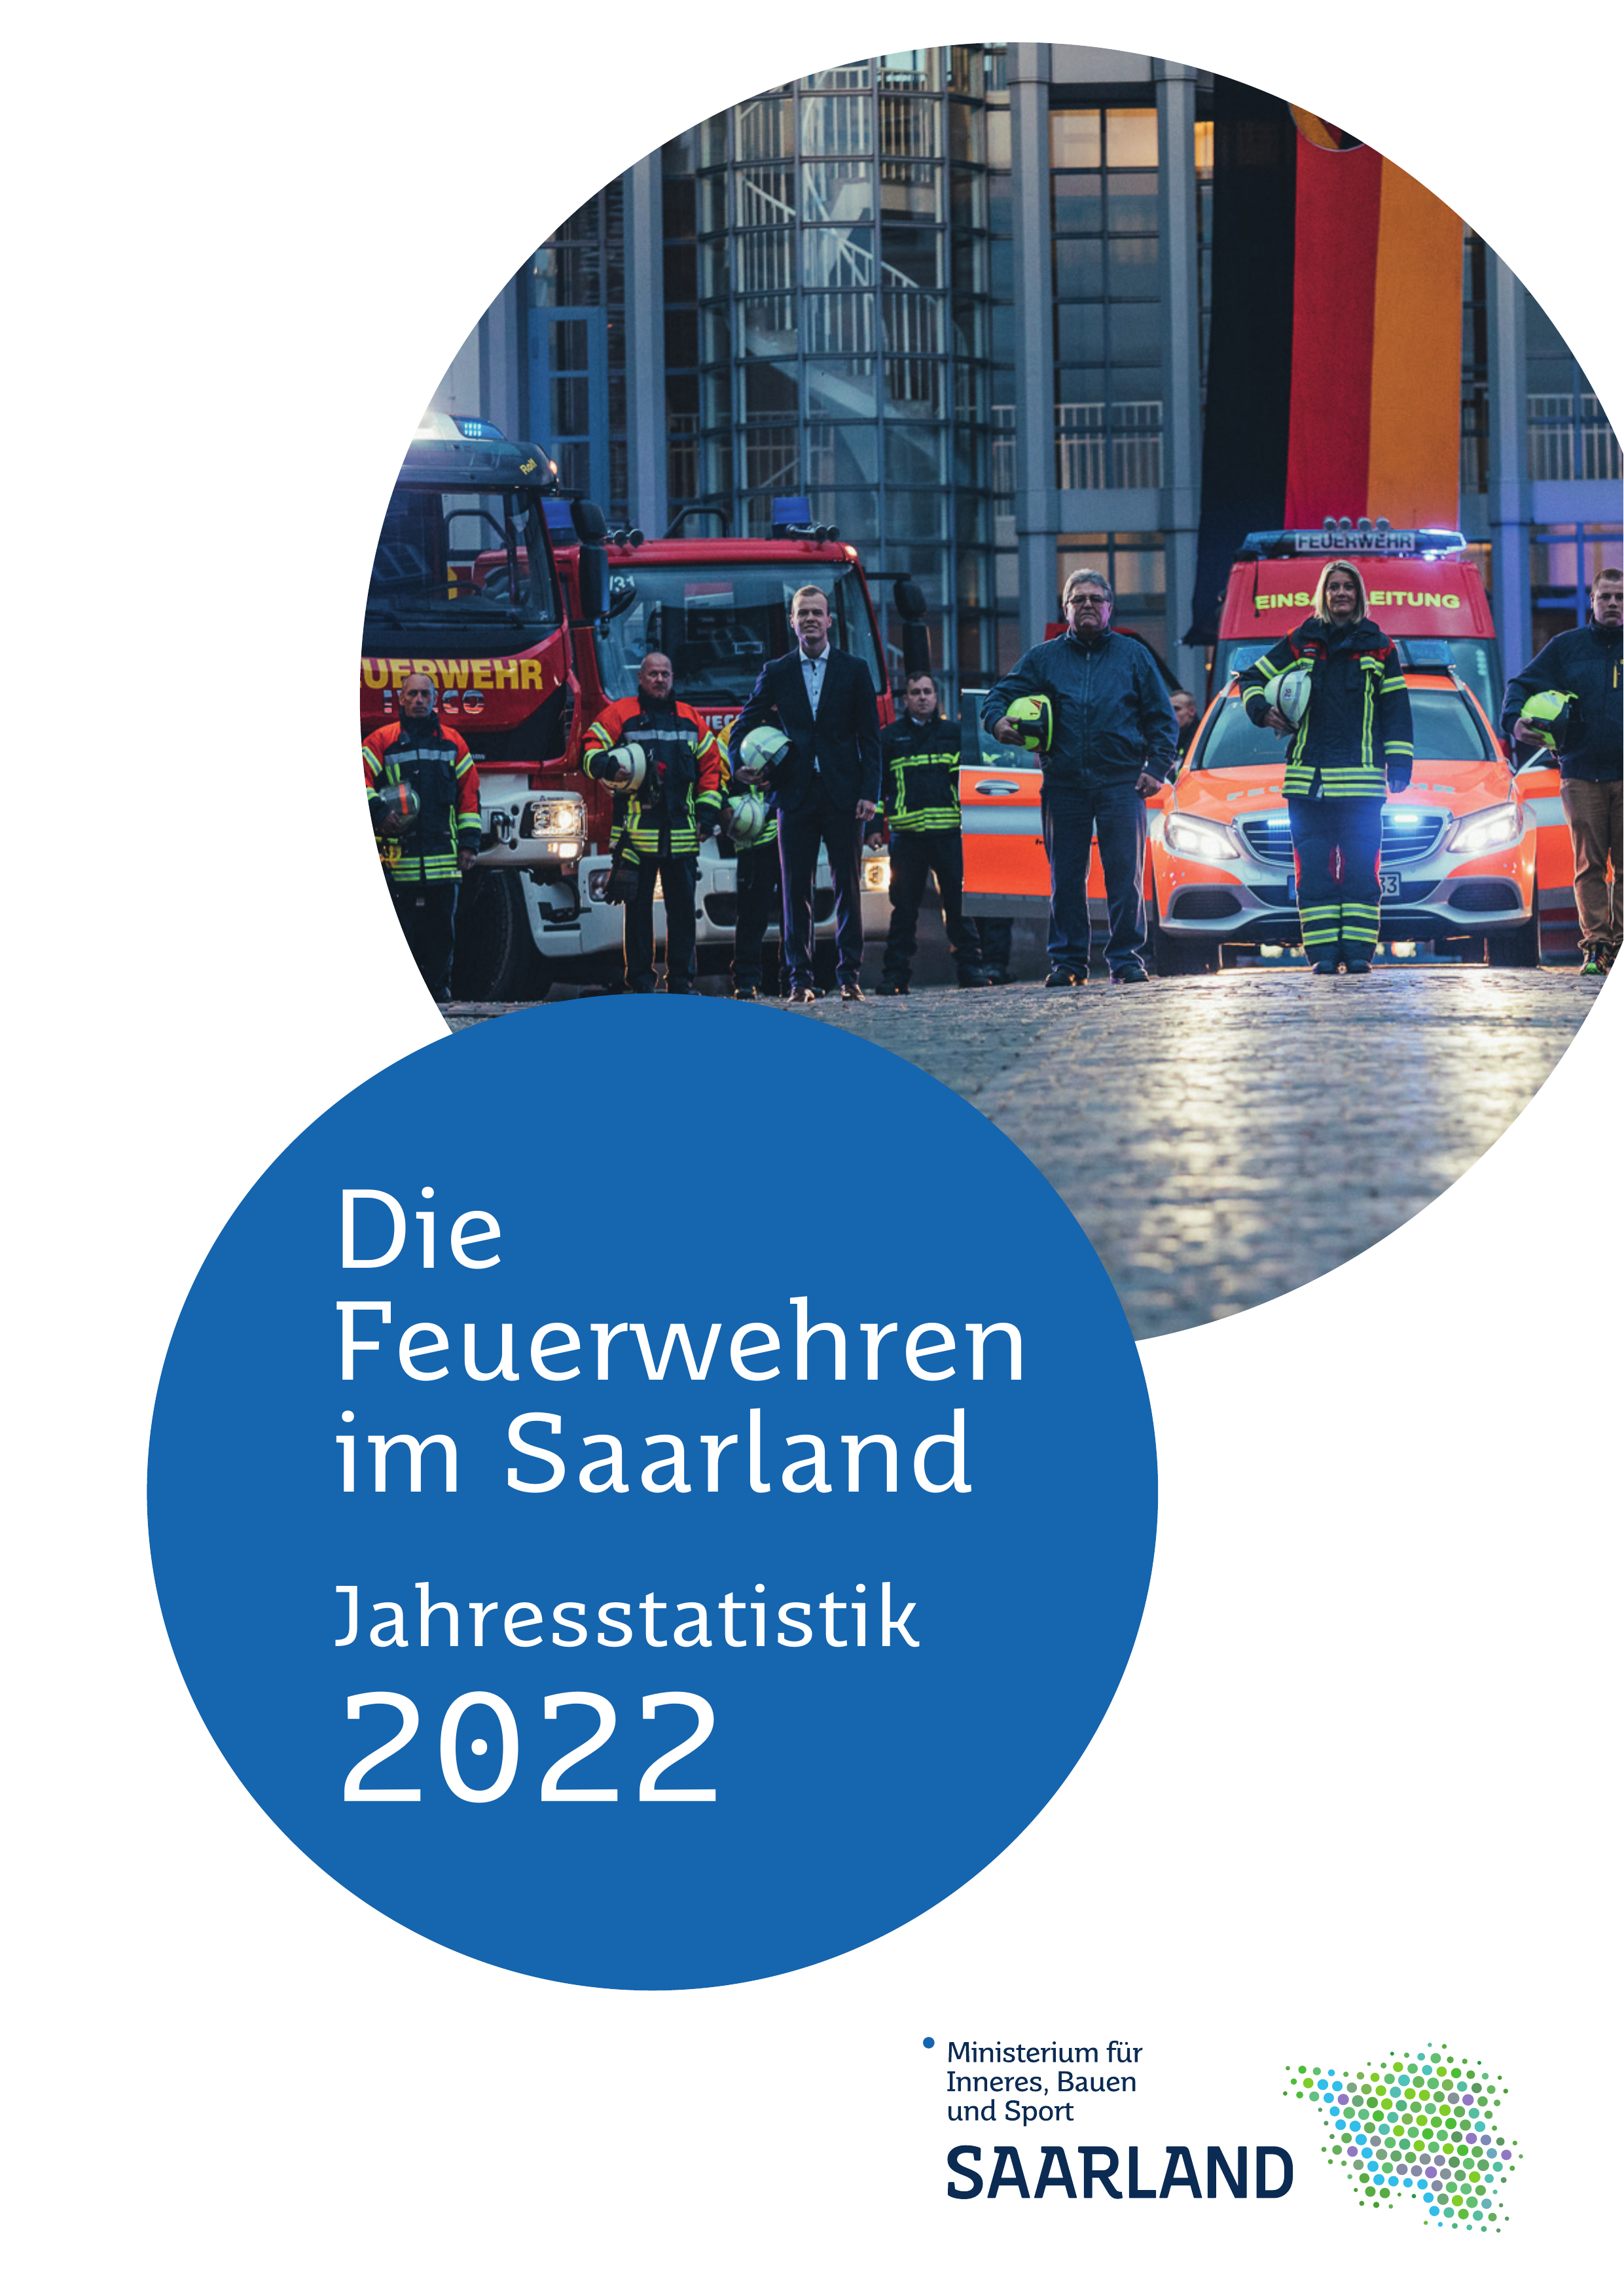

In [11]:
converted_pdf_to_img[0]

In [9]:
loader = PyPDFDirectoryLoader("data/")
docs = loader.load()
len(docs)

45

In [10]:
embeddings = HuggingFaceInstructEmbeddings(
    model_name="hkunlp/instructor-large", model_kwargs={"device": DEVICE}
)

load INSTRUCTOR_Transformer
max_seq_length  512


In [11]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)
texts = text_splitter.split_documents(docs)
len(texts)

44

In [12]:
db = Chroma.from_documents(texts, embeddings, persist_directory="db")

In [13]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GPTQ"
model_basename = "model"

tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, use_fast=True)

model = AutoGPTQForCausalLM.from_quantized(
    model_name_or_path,
    revision="gptq-4bit-128g-actorder_True",
    model_basename=model_basename,
    use_safetensors=True,
    trust_remote_code=True,
    inject_fused_attention=False,
    device=DEVICE,
    quantize_config=None,
)

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/837 [00:00<?, ?B/s]

WARNING - Exllamav2 kernel is not installed, reset disable_exllamav2 to True. This may because you installed auto_gptq using a pre-build wheel on Windows, in which exllama_kernels are not compiled. To use exllama_kernels to further speedup inference, you can re-install auto_gptq from source.
WARNING - CUDA kernels for auto_gptq are not installed, this will result in very slow inference speed. This may because:
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.
1. You disabled CUDA extensions compilation by setting BUILD_CUDA_EXT=0 when install auto_gptq from source.
2. You are using pytorch without CUDA support.
3. CUDA and nvcc are not installed in your device.


config.json:   0%|          | 0.00/761 [00:00<?, ?B/s]

quantize_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/7.26G [00:00<?, ?B/s]

INFO - The layer lm_head is not quantized.
INFO:auto_gptq.modeling._base:The layer lm_head is not quantized.


In [14]:
def generate_prompt(prompt):
    return f"[INST] {prompt} [/INST]".strip()

In [17]:
streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

In [18]:
text_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=1024,
    temperature=0,
    top_p=0.95,
    repetition_penalty=1.15,
    streamer=streamer,
)

The model 'LlamaGPTQForCausalLM' is not supported for text-generation. Supported models are ['BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'ElectraForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'GitForCausalLM', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoForCausalLM', 'GPTNeoXForCausalLM', 'GPTNeoXJapaneseForCausalLM', 'GPTJForCausalLM', 'JambaForCausalLM', 'JetMoeForCausalLM', 'LlamaForCausalLM', 'MambaForCausalLM', 'MarianForCausalLM', 'MBartForCausalLM', 'MegaForCausalLM', 'MegatronBertForCausalLM', 'MistralForCausalLM', 'MixtralForCausalLM', 'MptForCausalLM', 'MusicgenForCausalL

In [19]:
llm = HuggingFacePipeline(pipeline=text_pipeline, model_kwargs={"temperature": 0})

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 0.3. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFacePipeline`.
  warn_deprecated(


In [21]:
SYSTEM_PROMPT = "Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer."

template = generate_prompt(
    """
  {context}

  Question: {question}
  """
)

In [23]:
prompt = PromptTemplate(template=template, input_variables=["context", "question"])

In [24]:
qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

In [25]:
result = qa_chain("What is this document about ?")

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:520: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


 Based on the content of the document, it appears to be a report or summary of fire brigade activity in the Saarland region of Germany for the year 2021. The document includes information on the number of fires and assistance calls responded to by the fire brigades in different areas of the region, as well as the total number of hours spent on these activities. Additionally, there are tables showing the distribution of fires and assistance calls by month, and a breakdown of the types of incidents responded to (such as "Brände" or "fires," and "Hilfeleistungen" or "assistance").


In [ ]:
result


In [28]:
probable_result = qa_chain("Extract information about Fahrzeuge, their location and count in a structured json format. from page 32")

1 [INST] 
  2013 120
2014 124
2015 109
2016 105
2017 118
2018 112
2019 110
2020 66
2021 98
2022 160Lehrgangszahl
120 124
109
105118
112110
6698160
507090110130150170
2013 2014 2015 2016 2017 2018 2019 2020 2021 2022AnzahlLehrgangszahl

2013 1.920
2014 1.981
2015 1.711
2016 1.784
2017 1.991
2018 1.825
2019 1.674
2020 833
2021 1.083
2022 2.294Lehrgangsteilnehmerinnen und -teilnehmer
der Feuerwehrschule
1.9201.981
1.7111.7841.991
1.825
1.674
8331.0832.294
05001.0001.5002.0002.500
2013 2014 2015 2016 2017 2018 2019 2020 2021 2022TeilnehmerLehrgangsteilnehmerinnen und -teilnehmer

  Question: Extract information about Fahrzeuge, their location and count in a structured json format. from page 32
   

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:515: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:520: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


[/INST]  Based on the given page 32, here is the information about Fahrzeuge, their location, and count in a structured JSON format:

{
"Fahrzeuge": [
{
"Location": "Mannheim",
"Count": 20
},
{
"Location": "Ludwigshafen",
"Count": 15
},
{
"Location": "Heidelberg",
"Count": 12
},
{
"Location": "Karlsruhe",
"Count": 8
}
],
"Total Count": 65
}

Here's how the data was extracted:

* The first column lists the years 2013 to 2022.
* The second column lists the number of 

KeyboardInterrupt: 

In [29]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract
!pip install Pillow

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,183 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [47]:
vehicles_data = {
    'Merzig-Wadern': {'TSF/LF/TLF': 87, 'DL': 4, 'GW': 21, 'KdoW': 8, 'ELW': 6, 'SW': 2, 'WLF': 20},
    'Neunkirchen': {'TSF/LF/TLF': 61, 'DL': 3, 'GW': 17, 'KdoW': 8, 'ELW': 13, 'SW': 22},
    'Saarbrücken': {'TSF/LF/TLF': 106, 'DL': 13, 'GW': 43, 'KdoW': 16, 'ELW': 7, 'SW': 33},
    'Saarlouis': {'TSF/LF/TLF': 101, 'DL': 7, 'GW': 26, 'KdoW': 17, 'ELW': 8, 'SW': 24},
    'Saarpfalz-Kreis St. Wendel': {'TSF/LF/TLF': 76, 'DL': 3, 'GW': 26, 'KdoW': 9, 'ELW': 2, 'SW': 26},
    'St. Wendel': {'TSF/LF/TLF': 73, 'DL': 2, 'GW': 20, 'KdoW': 7, 'ELW': 10, 'SW': 6, 'WLF': 8, 'MTW': 28}
}


